<a href="https://colab.research.google.com/github/3791xk/Proj_AI_ML/blob/main/PAM_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
I started by loading the same Bird Bones dataset from Kaggle. This dataset features the length and diameter measurements for different birds as well as the bird's ecological group. In the previous assignment the model was trained to differentiate between Singing Birds and Not Singing Birds because we were using Logistic Regression. However, as here we are using a Decision Tree Classifier, we will attempt to sort each bird into the exact group it belongs to. It was also more effective to standardize the features to the ratio between the length and diameter of each type of bone rather than use the measurements individually for logistic regression. We will test both the plain measurements and the ratio here to compare and see what provides the best result.


### The different bird groups are:
* Swimming Birds (SW)
* Wading Birds (W)
* Terrestrial Birds (T)
* Raptors (R)
* Scansorial Birds (P)
* Singing Birds (SO)

### The different bones are:
* Humerus
* Ulna
* Femur
* Tibiotarsus
* Tarsometatarsus

### Diagram of the bird bones:
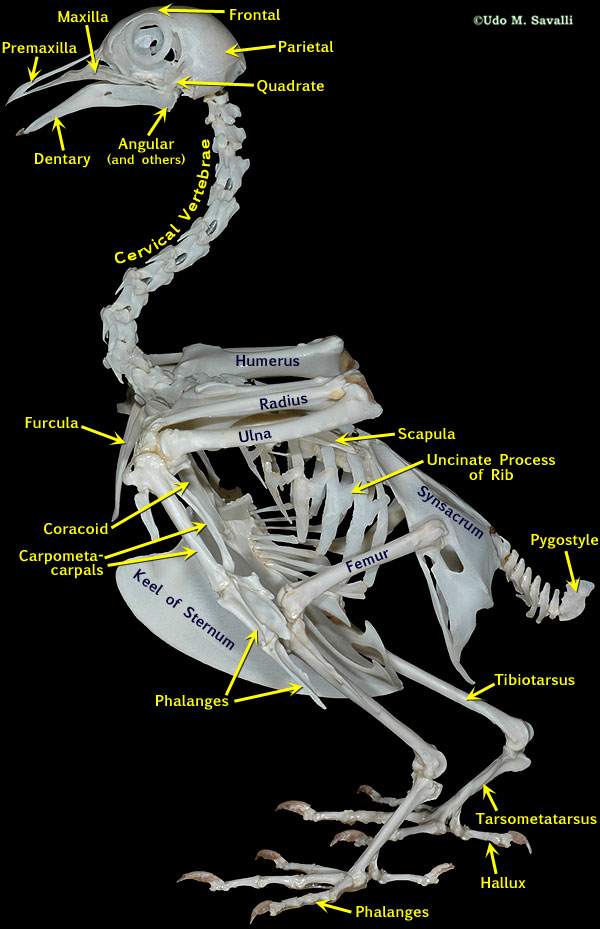

Diagram Source: https://www.savalli.us/BIO370/Anatomy/7.BirdSkeletonLabel.html

In [44]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
import tensorflow as tf
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
import sklearn
import xgboost
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Dataset: Bird Bones and Living Habits
# https://www.kaggle.com/datasets/zhangjuefei/birds-bones-and-living-habits/data

df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, 'zhangjuefei/birds-bones-and-living-habits/versions/1', 'bird.csv')
df.drop(columns=['id'], inplace=True)
df = df.dropna()
df.head()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


In [5]:
# Print shape and value counts by bird type
# Key:
# SW: Swimming Birds
# W: Wading Birds
# T: Terrestrial Birds
# R: Raptors
# P: Scansorial Birds
# SO: Singing Birds

print(df.shape)
df.type.value_counts()

(413, 11)


,count
type,
SO,124
SW,116
W,64
R,48
P,38
T,23


In [6]:
# independent variables
x = df.drop(['type'], axis=1)
# dependent/target variable
y = df.type

# divide data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.head())
print(y.head())

    huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw
0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84
1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01
2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34
3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41
4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13
0    SW
1    SW
2    SW
3    SW
4    SW
Name: type, dtype: object


### DTC Test No Modifications

In [33]:
# Sources:
# https://scikit-learn.org/dev/modules/tree.html#tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

dtc_plain = tree.DecisionTreeClassifier()
dtc_plain.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
test = dtc_plain.predict(x_test)
accuracy_score(y_test, test)

0.7619047619047619

[Text(0.375, 0.9545454545454546, 'x[0] <= 30.295\ngini = 0.787\nsamples = 336\nvalue = [30.0, 44.0, 102.0, 86.0, 19.0, 55.0]'),
 Text(0.14240506329113925, 0.8636363636363636, 'x[1] <= 2.565\ngini = 0.348\nsamples = 119\nvalue = [12, 0, 95, 5, 1, 6]'),
 Text(0.2587025316455696, 0.9090909090909092, 'True  '),
 Text(0.0949367088607595, 0.7727272727272727, 'x[0] <= 22.37\ngini = 0.27\nsamples = 107\nvalue = [4.0, 0.0, 91.0, 5.0, 1.0, 6.0]'),
 Text(0.0379746835443038, 0.6818181818181818, 'x[8] <= 16.28\ngini = 0.095\nsamples = 61\nvalue = [2, 0, 58, 0, 1, 0]'),
 Text(0.02531645569620253, 0.5909090909090909, 'x[6] <= 23.92\ngini = 0.64\nsamples = 5\nvalue = [2, 0, 2, 0, 1, 0]'),
 Text(0.012658227848101266, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.0379746835443038, 0.5, 'x[4] <= 19.18\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 0, 0, 1, 0]'),
 Text(0.02531645569620253, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0, 0]'),
 Text(0.05063291139240

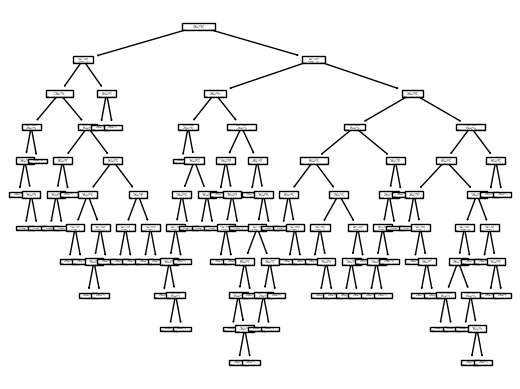

In [35]:
tree.plot_tree(dtc_plain)

### DTC Test Min Samples Leaf

In [36]:
dtc_min_leaf = tree.DecisionTreeClassifier(min_samples_leaf=5)
dtc_min_leaf.fit(x_train, y_train)
test2 = dtc_min_leaf.predict(x_test)
accuracy_score(y_test, test2)

0.6904761904761905

[Text(0.3484042553191489, 0.9444444444444444, 'x[0] <= 30.295\ngini = 0.787\nsamples = 336\nvalue = [30.0, 44.0, 102.0, 86.0, 19.0, 55.0]'),
 Text(0.13829787234042554, 0.8333333333333334, 'x[1] <= 2.565\ngini = 0.348\nsamples = 119\nvalue = [12, 0, 95, 5, 1, 6]'),
 Text(0.24335106382978722, 0.8888888888888888, 'True  '),
 Text(0.0851063829787234, 0.7222222222222222, 'x[0] <= 22.37\ngini = 0.27\nsamples = 107\nvalue = [4.0, 0.0, 91.0, 5.0, 1.0, 6.0]'),
 Text(0.0425531914893617, 0.6111111111111112, 'x[8] <= 16.28\ngini = 0.095\nsamples = 61\nvalue = [2, 0, 58, 0, 1, 0]'),
 Text(0.02127659574468085, 0.5, 'gini = 0.64\nsamples = 5\nvalue = [2, 0, 2, 0, 1, 0]'),
 Text(0.06382978723404255, 0.5, 'gini = 0.0\nsamples = 56\nvalue = [0, 0, 56, 0, 0, 0]'),
 Text(0.1276595744680851, 0.6111111111111112, 'x[4] <= 19.72\ngini = 0.455\nsamples = 46\nvalue = [2, 0, 33, 5, 0, 6]'),
 Text(0.10638297872340426, 0.5, 'gini = 0.408\nsamples = 7\nvalue = [0, 0, 0, 2, 0, 5]'),
 Text(0.14893617021276595, 0.5, '

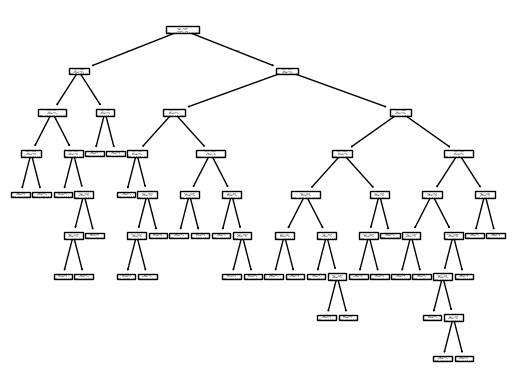

In [37]:
tree.plot_tree(dtc_min_leaf)

### DTC Test No Terrestrial Birds

After an initial test, I decided to test removing the Terrestrial Birds group as the class imbalance was too significant to properly model the difference between them and the other bird groups. It did not seem to affect accuracy much, and later I used the class weight parameter setting to more effectively make up for the different sample amounts in various bird group categories.


In [8]:
# Attempt with dropping terrestrial birds
# independent variables
x2 = df[df['type'] != 'T']
x2 = df.drop(['type'], axis=1)

# dependent/target variable
y2 = df.type

# divide data into train and test sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

print(x2.head())
print(y2.head())

    huml  humw  ulnal  ulnaw   feml  femw   tibl  tibw   tarl  tarw
0  80.78  6.68  72.01   4.88  41.81  3.70   5.50  4.03  38.70  3.84
1  88.91  6.63  80.53   5.59  47.04  4.30  80.22  4.51  41.50  4.01
2  79.97  6.37  69.26   5.28  43.07  3.90  75.35  4.04  38.31  3.34
3  77.65  5.70  65.76   4.77  40.04  3.52  69.17  3.40  35.78  3.41
4  62.80  4.84  52.09   3.73  33.95  2.72  56.27  2.96  31.88  3.13
0    SW
1    SW
2    SW
3    SW
4    SW
Name: type, dtype: object


In [10]:
dtc_no_t = tree.DecisionTreeClassifier()
dtc_no_t.fit(x2_train, y2_train)
test3 = dtc_no_t.predict(x2_test)
accuracy_score(y2_test, test3)

0.7469879518072289

### DTC Test with Ratio and Terrestrial Birds

Using the ratio of bird bones, as I did in the previous assignment once again helps with the models prediction ability, as the ratio between each bones length and diameter sets a bird apart more effectively than simply it's body measurements. The default DTC is very complex and achieves decent accuracy.

In [15]:
ratio_df = df.dropna()
ratio_df['HumerusRatio'] = df['huml'] / df['humw']
ratio_df['UlnaRatio'] = df['ulnal'] / df['ulnaw']
ratio_df['FemurRatio'] = df['feml'] / df['femw']
ratio_df['TibiotarsusRatio'] = df['tibl'] / df['tibw']
ratio_df['TarsometatarsusRatio'] = df['tarl'] / df['tarw']

ratio_df = ratio_df.drop(columns=['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw'])
print(ratio_df.head())

  type  HumerusRatio  UlnaRatio  FemurRatio  TibiotarsusRatio  \
0   SW     12.092814  14.756148   11.300000          1.364764   
1   SW     13.410256  14.406082   10.939535         17.787140   
2   SW     12.554160  13.117424   11.043590         18.650990   
3   SW     13.622807  13.786164   11.375000         20.344118   
4   SW     12.975207  13.965147   12.481618         19.010135   

   TarsometatarsusRatio  
0             10.078125  
1             10.349127  
2             11.470060  
3             10.492669  
4             10.185304  


In [16]:
# Attempt with dropping terrestrial birds and ratio
# independent variables
x3 = ratio_df[ratio_df['type'] != 'T']
x3 = ratio_df.drop(['type'], axis=1)

# dependent/target variable
y3 = ratio_df.type

# divide data into train and test sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

print(x3.head())
print(y3.head())

   HumerusRatio  UlnaRatio  FemurRatio  TibiotarsusRatio  TarsometatarsusRatio
0     12.092814  14.756148   11.300000          1.364764             10.078125
1     13.410256  14.406082   10.939535         17.787140             10.349127
2     12.554160  13.117424   11.043590         18.650990             11.470060
3     13.622807  13.786164   11.375000         20.344118             10.492669
4     12.975207  13.965147   12.481618         19.010135             10.185304
0    SW
1    SW
2    SW
3    SW
4    SW
Name: type, dtype: object


In [36]:
dtc_ratio = tree.DecisionTreeClassifier()
dtc_ratio.fit(x3_train, y3_train)
test4 = dtc_ratio.predict(x3_test)
accuracy_score(y3_test, test4)

0.7951807228915663

[Text(0.4044174382716049, 0.9545454545454546, 'x[0] <= 12.307\ngini = 0.791\nsamples = 330\nvalue = [31.0, 45.0, 95.0, 86.0, 18.0, 55.0]'),
 Text(0.20833333333333334, 0.8636363636363636, 'x[4] <= 13.544\ngini = 0.589\nsamples = 150\nvalue = [23, 7, 91, 7, 18, 4]'),
 Text(0.30637538580246915, 0.9090909090909092, 'True  '),
 Text(0.09567901234567901, 0.7727272727272727, 'x[1] <= 14.082\ngini = 0.724\nsamples = 44\nvalue = [16.0, 2.0, 2.0, 6.0, 15.0, 3.0]'),
 Text(0.037037037037037035, 0.6818181818181818, 'x[2] <= 10.83\ngini = 0.579\nsamples = 22\nvalue = [1, 0, 0, 5, 13, 3]'),
 Text(0.024691358024691357, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0]'),
 Text(0.04938271604938271, 0.5909090909090909, 'x[1] <= 11.14\ngini = 0.381\nsamples = 17\nvalue = [1, 0, 0, 0, 13, 3]'),
 Text(0.037037037037037035, 0.5, 'x[0] <= 10.001\ngini = 0.56\nsamples = 5\nvalue = [1, 0, 0, 0, 1, 3]'),
 Text(0.024691358024691357, 0.4090909090909091, 'x[1] <= 9.692\ngini = 0.5\nsamples =

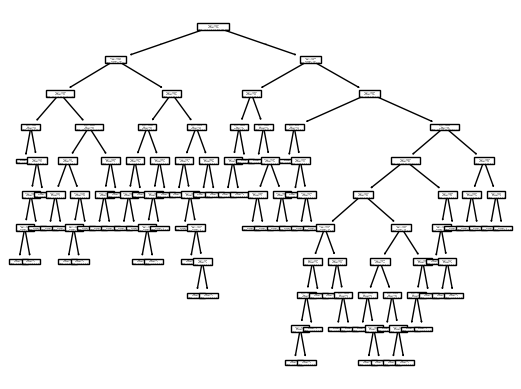

In [32]:
tree.plot_tree(dtc_ratio)

### DTC Test with low Max Depth using Ratio

With this test, you can see that a significantly simpler tree provides only slightly lower accuracy than the plain dataset, implying that a lot of the decision tree in those problems is unecessary. The complexity is likely a sign of overfitting and may not generalize well for other data sources.

In [39]:
dtc_ratio_depth = tree.DecisionTreeClassifier(max_depth=4)
dtc_ratio_depth.fit(x3_train, y3_train)
test5 = dtc_ratio_depth.predict(x3_test)
accuracy_score(y3_test, test5)

0.7590361445783133

[Text(0.5, 0.9, 'x[0] <= 12.307\ngini = 0.791\nsamples = 330\nvalue = [31.0, 45.0, 95.0, 86.0, 18.0, 55.0]'),
 Text(0.25, 0.7, 'x[4] <= 13.544\ngini = 0.589\nsamples = 150\nvalue = [23, 7, 91, 7, 18, 4]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[1] <= 14.082\ngini = 0.724\nsamples = 44\nvalue = [16.0, 2.0, 2.0, 6.0, 15.0, 3.0]'),
 Text(0.0625, 0.3, 'x[2] <= 10.83\ngini = 0.579\nsamples = 22\nvalue = [1, 0, 0, 5, 13, 3]'),
 Text(0.03125, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0]'),
 Text(0.09375, 0.1, 'gini = 0.381\nsamples = 17\nvalue = [1, 0, 0, 0, 13, 3]'),
 Text(0.1875, 0.3, 'x[3] <= 22.497\ngini = 0.508\nsamples = 22\nvalue = [15.0, 2.0, 2.0, 1.0, 2.0, 0.0]'),
 Text(0.15625, 0.1, 'gini = 0.37\nsamples = 18\nvalue = [14, 2, 0, 0, 2, 0]'),
 Text(0.21875, 0.1, 'gini = 0.625\nsamples = 4\nvalue = [1, 0, 2, 1, 0, 0]'),
 Text(0.375, 0.5, 'x[3] <= 20.392\ngini = 0.287\nsamples = 106\nvalue = [7, 5, 89, 1, 3, 1]'),
 Text(0.3125, 0.3, 'x[0] <= 11.291\ngini = 0.694\

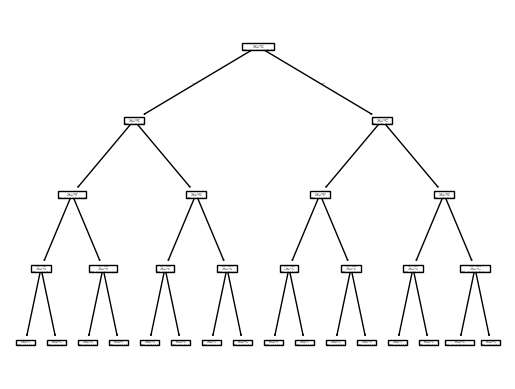

In [40]:
tree.plot_tree(dtc_ratio_depth)

### DTC with Class Weight Balanced using Ratio

In this example, you can see we are back to very high depth and complexity in the tree structure, but a slightly higher accuracy as the `class weight` feature attempts to weigh the classification groups equally regardless of number of samples. This is the highest accuracy we have achieved so far with decision trees.

In [52]:
dtc_ratio_weight = tree.DecisionTreeClassifier(class_weight='balanced')
dtc_ratio_weight.fit(x3_train, y3_train)
test6 = dtc_ratio_weight.predict(x3_test)
accuracy_score(y3_test, test6)

0.8192771084337349

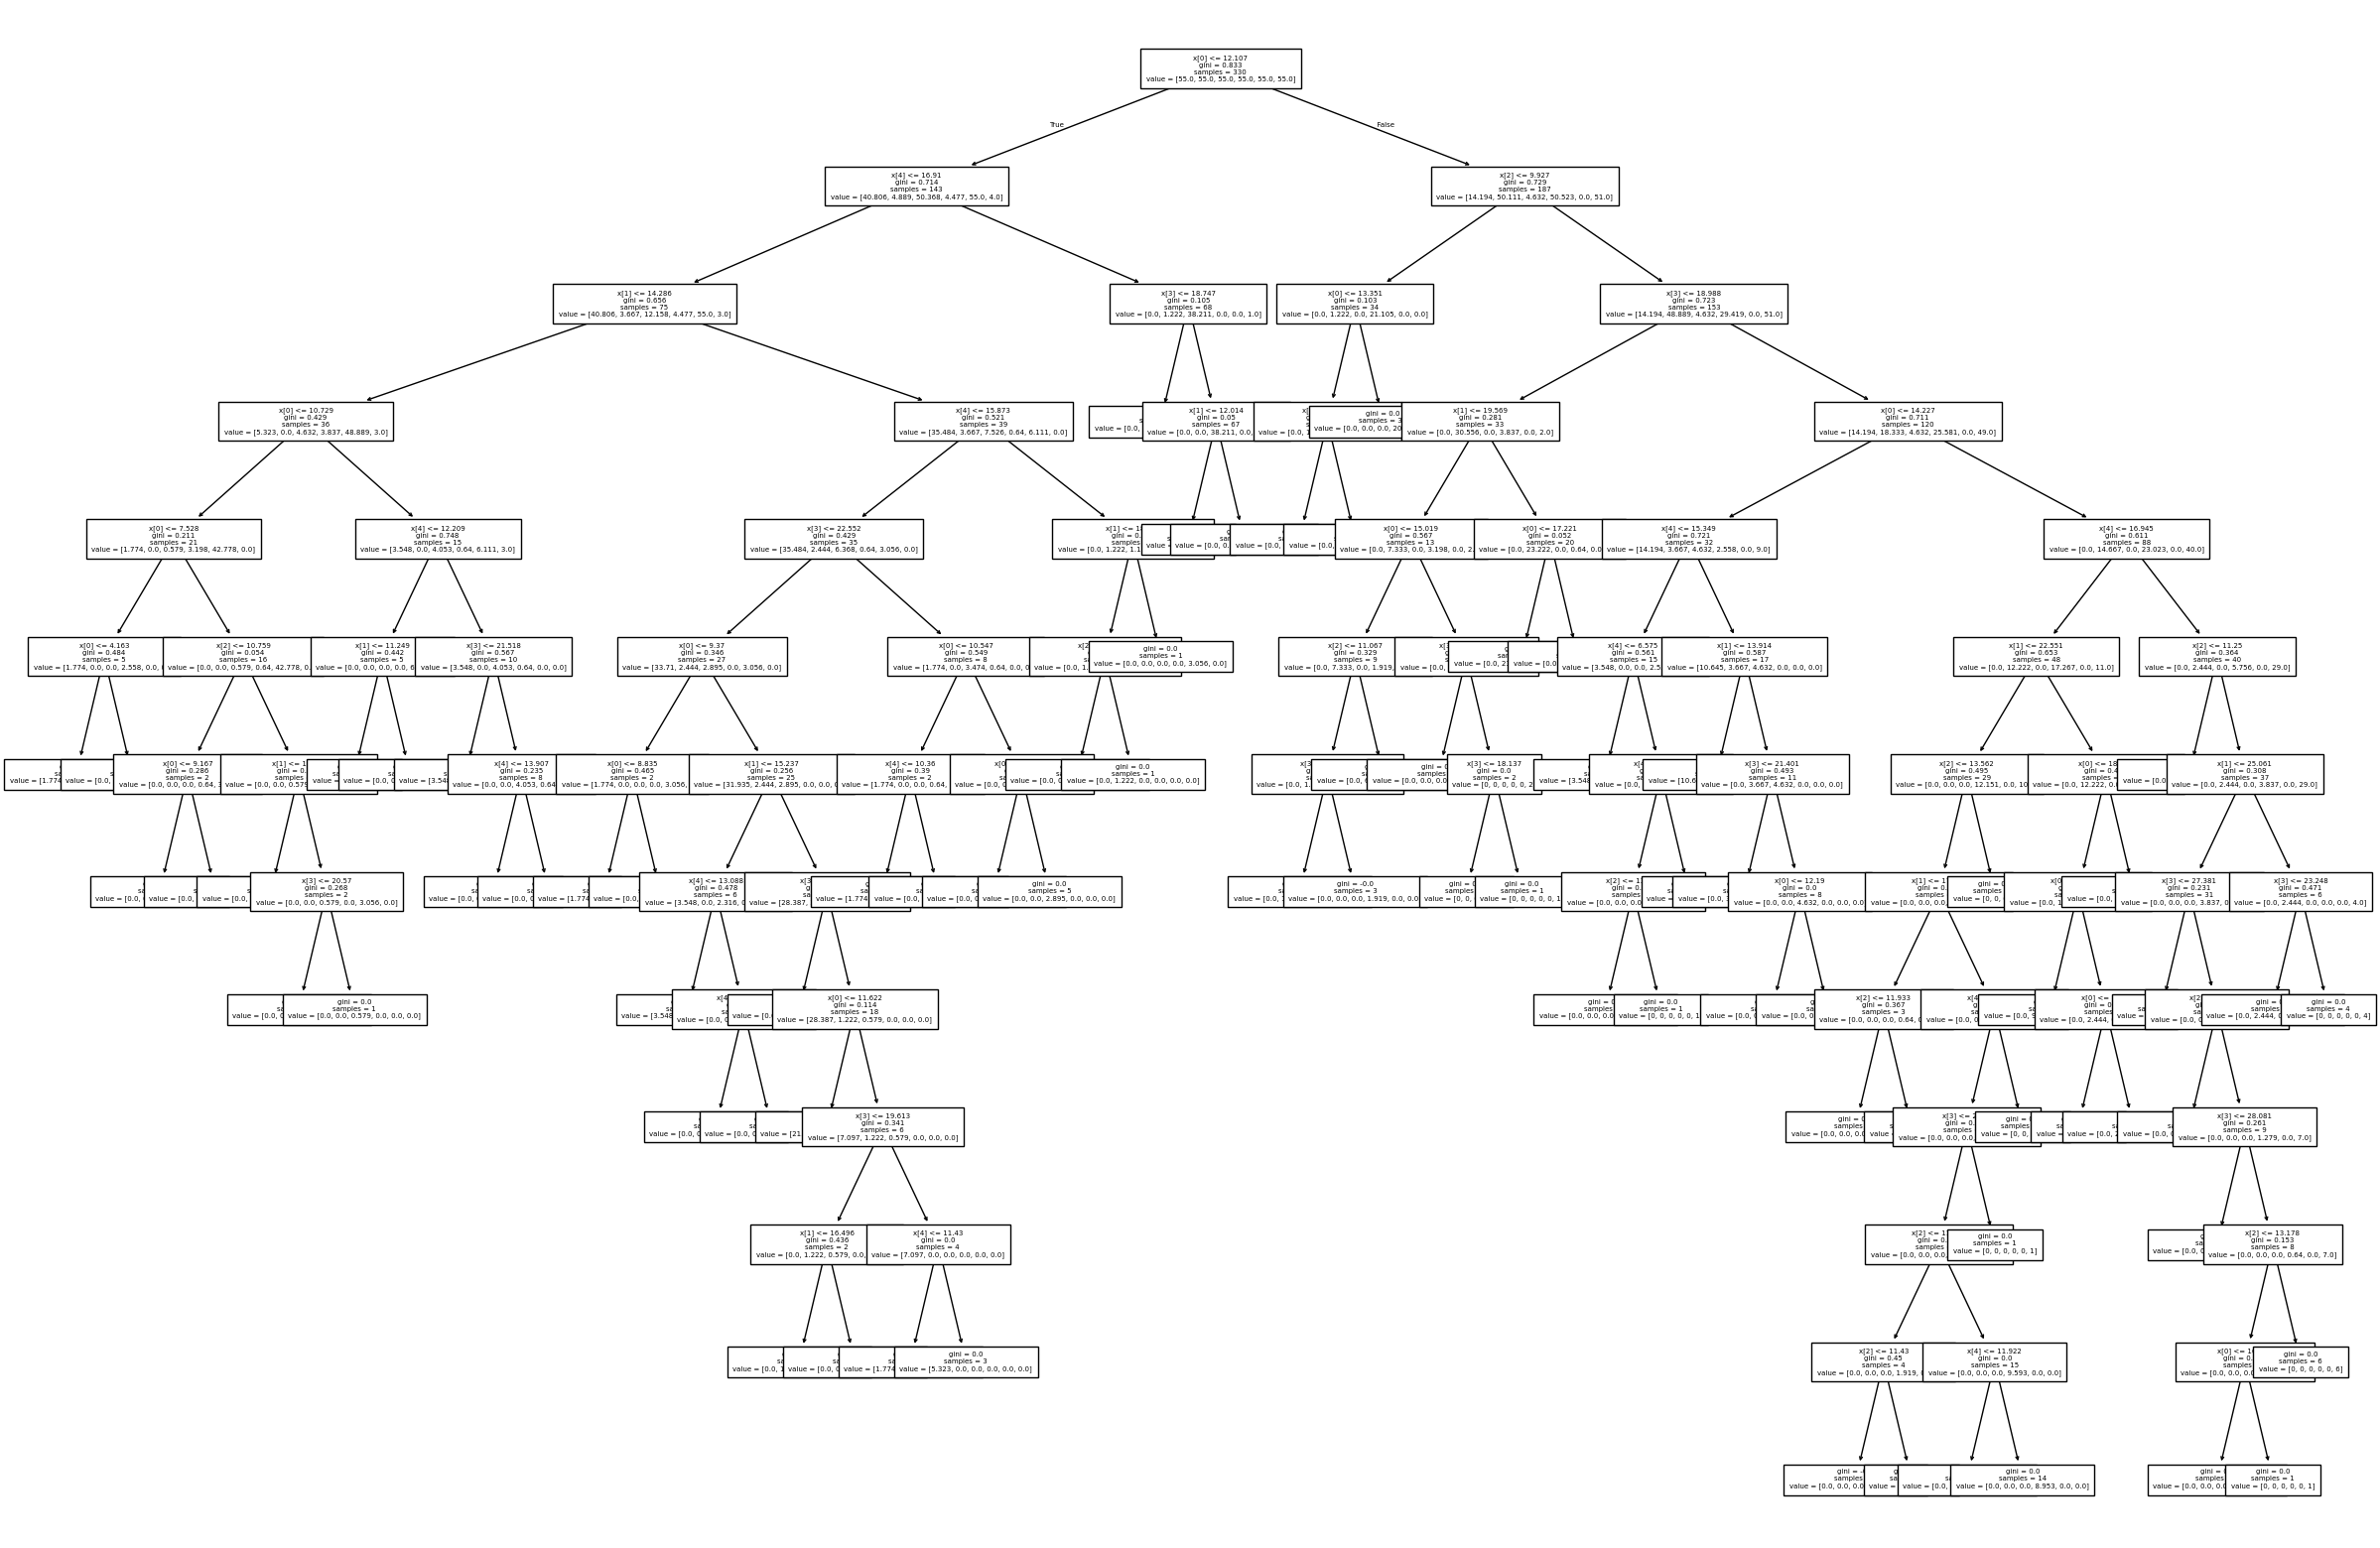

In [79]:
plt.figure(figsize=(30,20))
tree.plot_tree(dtc_ratio_weight, fontsize=5)
plt.show()

### DTC with Class Wight Balanced and Max Depth using Ratio

Using a max depth of 5 rather than the 12 depth in the just Class Weight Balanced example provides almost identical accuracy with a significantly simpler model. This is likely because it not overfitted to the dataset and is more generalizeable in its results.

In [17]:
dtc_ratio_weight_depth = tree.DecisionTreeClassifier(class_weight='balanced', max_depth=5)
dtc_ratio_weight_depth.fit(x3_train, y3_train)
test7 = dtc_ratio_weight_depth.predict(x3_test)
accuracy_score(y3_test, test7)

0.8072289156626506

[Text(0.5, 0.9166666666666666, 'x[0] <= 12.107\ngini = 0.833\nsamples = 330\nvalue = [55.0, 55.0, 55.0, 55.0, 55.0, 55.0]'),
 Text(0.3157894736842105, 0.75, 'x[4] <= 16.91\ngini = 0.714\nsamples = 143\nvalue = [40.806, 4.889, 50.368, 4.477, 55.0, 4.0]'),
 Text(0.40789473684210525, 0.8333333333333333, 'True  '),
 Text(0.21052631578947367, 0.5833333333333334, 'x[1] <= 14.286\ngini = 0.656\nsamples = 75\nvalue = [40.806, 3.667, 12.158, 4.477, 55.0, 3.0]'),
 Text(0.10526315789473684, 0.4166666666666667, 'x[0] <= 10.729\ngini = 0.429\nsamples = 36\nvalue = [5.323, 0.0, 4.632, 3.837, 48.889, 3.0]'),
 Text(0.05263157894736842, 0.25, 'x[0] <= 7.528\ngini = 0.211\nsamples = 21\nvalue = [1.774, 0.0, 0.579, 3.198, 42.778, 0.0]'),
 Text(0.02631578947368421, 0.08333333333333333, 'gini = 0.484\nsamples = 5\nvalue = [1.774, 0.0, 0.0, 2.558, 0.0, 0.0]'),
 Text(0.07894736842105263, 0.08333333333333333, 'gini = 0.054\nsamples = 16\nvalue = [0.0, 0.0, 0.579, 0.64, 42.778, 0.0]'),
 Text(0.1578947368421052

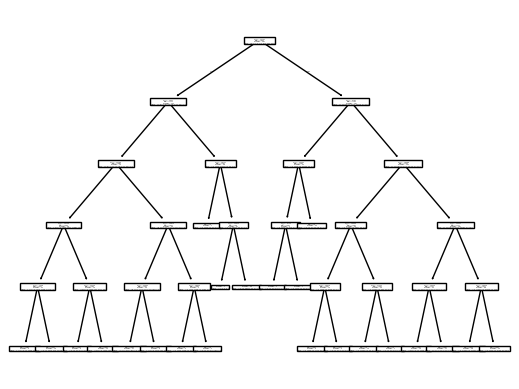

In [51]:
tree.plot_tree(dtc_ratio_weight_depth)

### Sensitivity Analysis

We will analyze the sensitivity by using the built-in feature importance function on the scikit learn decision tree. Making a readable diagram (as seen below) allows you to zoom in and see what each subtree of the main tree is actually using to decide on the criteria. Zooming in, we can see the Gini index and how pure each spit of the decision tree is for the features it is deciding on. Unfortunately many of the nodes have relatively high Gini impurity values. The Gini index values are clearly lower in the decision tree above where we did not limit the depth to 5. Looking at feature importance value, we can see that Humerus Ratio - which has the highest feature importance of 0.337 -  can be seen as a fairly decisive decision makes in many subtress across the cecision tree. The Femur Ratio has the lowest feature importance, which seems consistent with the pairplots we did in the last assignment that show all the femur ratios more clumped together and less spread out than the other features. The overall significance of Humerus and Ulna ratio being higher in importance for the model's decision boundary than the Femur and Tibiotarsus could suggest that the wings of different ecological bird groups are more unique than the legs are, although the Tarsometatarsus (also in the leg) is quite decisive.

Source:

[A framework for sensitivity analysis of decision trees](https://pmc.ncbi.nlm.nih.gov/articles/PMC5767274/#Sec7)

[ML | Gini Impurity and Entropy in Decision Tree](https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/)

[feature_importances_ property](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

In [55]:
importance = dtc_ratio_weight_depth.feature_importances_
print('HumerusRatio UlnaRatio FemurRatio TibiotarsusRatio TarsometatarsusRatio')
print(importance)

HumerusRatio UlnaRatio FemurRatio TibiotarsusRatio TarsometatarsusRatio
[0.33708117 0.18046048 0.08745128 0.12640389 0.26860317]


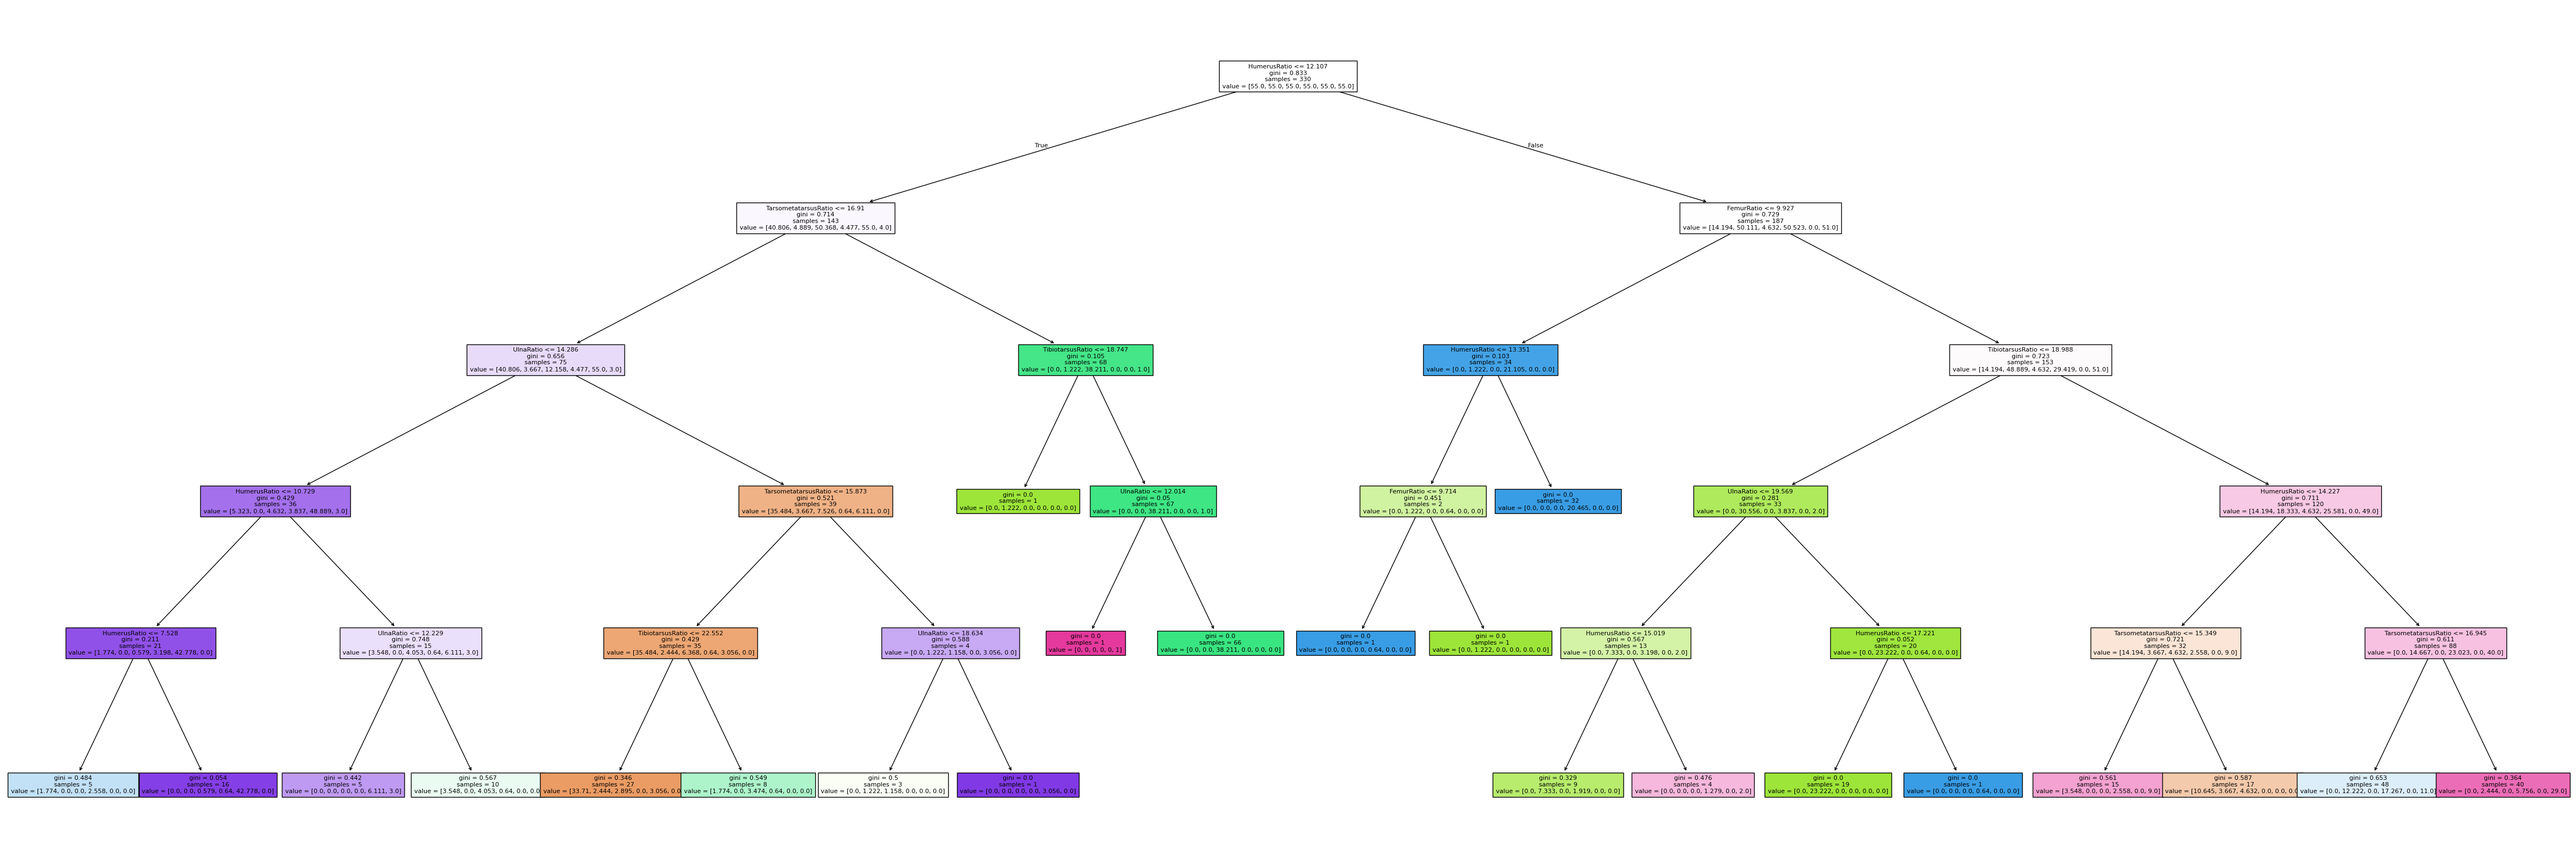

In [74]:
import matplotlib
plt.figure(figsize=(60,20))
tree.plot_tree(dtc_ratio_weight_depth,
               feature_names = x3.columns,
               filled = True,
               fontsize = 8
               )
plt.show()

# Task 2

## Bagging method with Bootstrapping

The bagging method allows us to combine the results of smaller classifiers fitted on random subsets of the original data. Bootstrapping allows us to stretch our relatively small dataset by selecting an observation multiple times. We'll continue to use the dataset with ratios.

After fitting the model, we can see that the overall accuracy of the combined model on the test data we set aside is significantly higher (many standard deviations) than the accuracy of the smaller models used to create it.

In [5]:
def evaluate(test_predictions, test_solutions):
  print("Test")
  accuracy = accuracy_score(test_solutions, test_predictions)
  print("Accuracy: ", accuracy)
  precision = precision_score(test_solutions, test_predictions, average='weighted')
  print("Precision: ", precision)
  recall = recall_score(test_solutions, test_predictions, average='weighted')
  print("Recall: ", recall)
  f1 = f1_score(test_solutions, test_predictions, average='weighted')
  print("F1 Score: ", f1)

### Bagging Model with 10 Folds

In [18]:
bag_class_10 = BaggingClassifier(n_estimators=50)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(bag_class_10, x3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model
bag_class_10.fit(x3_train, y3_train)

# test accuracy
test8 = bag_class_10.predict(x3_test)
evaluate(y3_test, test8)

Accuracy: 0.773 (0.082)
Test
Accuracy:  0.891566265060241
Precision:  0.9019750595155664
Recall:  0.891566265060241
F1 Score:  0.8843847194104602


### Bagging Model with 5 Folds

In [106]:
bag_class_5 = BaggingClassifier(n_estimators=50)
# model stats
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(bag_class_5, x3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# fit and measure
bag_class_5.fit(x3_train, y3_train)
test9 = bag_class_5.predict(x3_test)
evaluate(y3_test, test9)

Accuracy: 0.772 (0.059)
Test
Accuracy:  0.8674698795180723
Precision:  0.8795042237917187
Recall:  0.8674698795180723
F1 Score:  0.8621855563444238


### Bagging Model with 15 Folds

In [30]:
bag_class_15 = BaggingClassifier(n_estimators=50)
# model stats
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
n_scores = cross_val_score(bag_class_15, x3_train, y3_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# fit and measure
bag_class_15.fit(x3_train, y3_train)
test10 = bag_class_15.predict(x3_test)
evaluate(y3_test, test10)

Accuracy: 0.773 (0.078)
Test
Accuracy:  0.8795180722891566
Precision:  0.8946749230089488
Recall:  0.8795180722891566
F1 Score:  0.8733842638725327


Comparing the effects of various numbers of fold on the Bagging algorithm, shows that there isn't a significant difference in accuracy for this datset to increase the number of folds from 5 to 10, although the precision of the classification is higher. The results of 15 folds appear to produce almost the exact same results as the 10 folds model does. The Recall and Precision scores of 10 and 15 are also slightly higher than for the 5 folds model. I think that we can conclude that for this small dataset, it is not worth raising the number of stratified k-folds. The ideal functionality here is achieved at 10 folds.


## XGBoost method

XGBoost is looking for numerical vector outcomes so the types are translated into arbitrary numbers.

0. Swimming Birds (SW)
1. Wading Birds (W)
2. Terrestrial Birds (T)
3. Raptors (R)
4. Scansorial Birds (P)
5. Singing Birds (SO)

In [6]:
# XGBoost is looking for numerical vector outcomes
# We translate our groupings into arbitrary numbers

mapping = {'SW': 0, 'SO': 5, 'W': 1, "P": 4, "R": 3, "T": 2}
num_df = ratio_df
num_df['NumericType'] = num_df['type'].map(mapping)
num_df = num_df.drop(columns=['type'])

num_df.head()

,HumerusRatio,UlnaRatio,FemurRatio,TibiotarsusRatio,TarsometatarsusRatio,NumericType
0,12.092814,14.756148,11.300000,1.364764,10.078125,0
1,13.410256,14.406082,10.939535,17.787140,10.349127,0
2,12.554160,13.117424,11.043590,18.650990,11.470060,0
3,13.622807,13.786164,11.375000,20.344118,10.492669,0
4,12.975207,13.965147,12.481618,19.010135,10.185304,0


### Boosting Model with 5 Folds

In [19]:
# Attempt with dropping terrestrial birds and ratio
# independent variables
x4 = num_df.drop(['NumericType'], axis=1)

# dependent/target variable
y4 = num_df.NumericType

# divide data into train and test sets
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=42)

print(x4.head())
print(y4.head())

   HumerusRatio  UlnaRatio  FemurRatio  TibiotarsusRatio  TarsometatarsusRatio
0     12.092814  14.756148   11.300000          1.364764             10.078125
1     13.410256  14.406082   10.939535         17.787140             10.349127
2     12.554160  13.117424   11.043590         18.650990             11.470060
3     13.622807  13.786164   11.375000         20.344118             10.492669
4     12.975207  13.965147   12.481618         19.010135             10.185304
0    0
1    0
2    0
3    0
4    0
Name: NumericType, dtype: int64


In [20]:
boost_5 = XGBClassifier(n_estimators=100, max_depth=4, objective='multi:softmax')
# model stats
kfold = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
vals = cross_val_score(boost_5, x4_train, y4_train, cv=kfold)
print('Accuracy: %.3f (%.3f)' % (np.mean(vals), np.std(vals)))

# fit and measure
boost_5.fit(x4_train, y4_train)
test11 = boost_5.predict(x4_test)
evaluate(y4_test, test11)

Accuracy: 0.800 (0.054)
Test
Accuracy:  0.8795180722891566
Precision:  0.8932544628431625
Recall:  0.8795180722891566
F1 Score:  0.8705556416700093


### Boosting Model with 10 Folds

In [40]:
boost_10 = XGBClassifier(n_estimators=100, max_depth=4, objective='multi:softmax')
# model stats
kfold = sklearn.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
vals = cross_val_score(boost_10, x4_train, y4_train, cv=kfold)
print('Accuracy: %.3f (%.3f)' % (np.mean(vals), np.std(vals)))

# fit and measure
boost_10.fit(x4_train, y4_train)
test12 = boost_10.predict(x4_test)
evaluate(y4_test, test12)

Accuracy: 0.788 (0.097)
Test
Accuracy:  0.8795180722891566
Precision:  0.8932544628431625
Recall:  0.8795180722891566
F1 Score:  0.8705556416700093


### Boosting Model with 15 Folds

In [47]:
boost_15 = XGBClassifier(n_estimators=100, max_depth=4, objective='multi:softmax')
# model stats
kfold = sklearn.model_selection.StratifiedKFold(n_splits=15, shuffle=True, random_state=1)
vals = cross_val_score(boost_15, x4_train, y4_train, cv=kfold)
print('Accuracy: %.3f (%.3f)' % (np.mean(vals), np.std(vals)))

# fit and measure
boost_15.fit(x4_train, y4_train)
test13 = boost_15.predict(x4_test)
evaluate(y4_test, test13)

Accuracy: 0.809 (0.069)
Test
Accuracy:  0.8795180722891566
Precision:  0.8932544628431625
Recall:  0.8795180722891566
F1 Score:  0.8705556416700093


In [45]:
print(test11 == test12)
print(test12 == test13)
print(test11)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  

Although the three different XGBoost models have different amounts of folds, they all seem to train in a way that predicts the same values. The incorrectly predicted values are likely ones that break the pre-established pattern of the data and are outliers. I believe this demonstrates the efficiency of the XGBoost model which can produce its consistent results at any of these fold levels. Because the data is the same, so are the accuracy, precision, recall, and F1 score.

Both Bagging and Boosting seem to be able to bring this test dataset to around the same level of accuracy (around 87-88%), but not further. The performance of Bagging does increase slighlty between 5 and 10 folds, but otherwise holds almost constant. The Boosting model just levels out and returns the same results for all three fold numbers, not changing in performance based on the metric, likely because the dataset is small and the test data has outliers or examples completely unseen in the training data.

# Task 3

### Confusion Matrix for Boosting

In [10]:
# Source: https://www.sqlservercentral.com/articles/model-selection-and-performance-boosting-with-k-fold-cross-validation-and-xgboost

boost_confusion = XGBClassifier(n_estimators=100, max_depth=4, objective='multi:softmax')
# model stats
kfold = sklearn.model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# confusion matrix after just first fold
train_i, test_i = next(kfold.split(x4_train, y4_train))
x_train_small, x_train_validation = x4_train.iloc[train_i], x4_train.iloc[test_i]
y_train_small, y_train_validation = y4_train.iloc[train_i], y4_train.iloc[test_i]
boost_confusion.fit(x_train_small, y_train_small)
test14 = boost_confusion.predict(x_train_validation)
cm = confusion_matrix(y_train_validation, test14)
print(cm)

evaluate(y_train_validation, test14)

[[15  2  1  0  0  0]
 [ 3  6  0  1  0  1]
 [ 0  0  3  0  0  0]
 [ 2  2  0  5  0  0]
 [ 1  0  1  1  2  1]
 [ 0  0  0  0  0 19]]
Test
Accuracy:  0.7575757575757576
Precision:  0.8107591062136517
Recall:  0.7575757575757576
F1 Score:  0.7718656343656344


This confusion matrix shows that there are overall positive results, with highest values on the top left - bottom right diagonal indicating true positives. It seems to struggle the most with the wading birds (row/column 2) as that type suffers from more false positives and false negatives than most of the other types. A decent number of swimming birds are also false positives/negatives, but that is because they are more represented in the sample size and there are just more samples of that type.

### Confusion Matrix for Bagging

In [12]:
bag_confusion = BaggingClassifier(n_estimators=50)
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# confusion matrix after just first fold
train_i2, test_i2 = next(cv.split(x4_train, y4_train))
x_train_small2, x_train_validation2 = x4_train.iloc[train_i2], x4_train.iloc[test_i2]
y_train_small2, y_train_validation2 = y4_train.iloc[train_i2], y4_train.iloc[test_i2]

bag_confusion.fit(x_train_small2, y_train_small2)
test15 = bag_confusion.predict(x_train_validation2)
cm2 = confusion_matrix(y_train_validation2, test15)
print(cm2)

evaluate(y_train_validation2, test15)

[[7 1 1 0 0 0]
 [2 4 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 4 0 0]
 [1 0 0 0 2 0]
 [0 0 0 0 1 8]]
Test
Accuracy:  0.7878787878787878
Precision:  0.793939393939394
Recall:  0.7878787878787878
F1 Score:  0.780444372422982


This confusion matrix also shows overall positive results, with many high numbers on the top left - bottom right diagonal indicating true positives. It also seems to struggle with the wading birds (row/column 2) with 2 false negatives compared to 4 true positives and 1 false positive. The overrepresented swimming birds again show a higher amount of false positives/negatives purely because there are significantly more of them in the sample.

### Comparing models with Paires T-Test
I will be comparing the final Decision Tree Classifier, the Bagging model with 10 folds, and the XGBoost with 5 folds.

Source: https://www.geeksforgeeks.org/how-to-conduct-a-paired-samples-t-test-in-python/

In [30]:
# DTC: dtc_ratio_weight_depth
# Bag: bag_class_10
# Boost: boost_5

bag_test = bag_class_10.predict(x3_test)
dtc_test = dtc_ratio_weight_depth.predict(x3_test)
bst_test = boost_5.predict(x3_test)

In [36]:
# DTC and Bagging produce the classification categories as output, but XGBoost has them translated into numerics.
# So here we map everything

mapping = {'SW': 0, 'SO': 5, 'W': 1, "P": 4, "R": 3, "T": 2}
if (isinstance(bag_test[0], (str))):
  bag_test = [mapping[i] for i in bag_test]
if (isinstance(dtc_test[0], (str))):
  dtc_test = [mapping[i] for i in dtc_test]

In [38]:
dg_stat, dg_p = stats.ttest_rel(dtc_test, bag_test)
print("DTC vs Bagging")
print("T-value: ", dg_stat, "P-value", dg_p)

ds_stat, ds_p = stats.ttest_rel(dtc_test, bst_test)
print("DTC vs Boosting")
print("T-value: ", ds_stat, "P-value", ds_p)

gs_stat, gs_p = stats.ttest_rel(bag_test, bst_test)
print("Bagging vs Boosting")
print("T-value: ", gs_stat, "P-value", gs_p)


DTC vs Bagging
T-value:  -1.0127354574893108 P-value 0.3141655327200025
DTC vs Boosting
T-value:  -1.649845962884055 P-value 0.102800158728631
Bagging vs Boosting
T-value:  -0.5750175312895448 P-value 0.5668538648299892


In these t-tests, our null hypothesis is that the predictions of each set of two machine learning outputs are equal. A p-value of $0.05$ or less in this two-sided t-test would be enough proof to confidently reject the null hypothesis and prove that they are distinctly different results. However, as the lowest p-value is $0.10$, we can only be about $90\%$ confident that the predictions are equal. The models with that lowest score are the Decision Tree Classifier and XGBoost. The results of the Bagging model are statistically proven different from each of the other models with very high p-values.

### Bias and Variance

Source: https://www.geeksforgeeks.org/bias-vs-variance-in-machine-learning/

In [41]:
def bias_variance(y_pred, y_test):
    mean= np.mean(y_pred, axis=0)
    bias = np.mean((mean - y_test) ** 2)
    var = np.mean(np.var(y_pred, axis=0))
    print("Bias: ", bias, "Variance", var)

In [43]:
if (isinstance(y3_test[0], (str))):
  num_y_test = [mapping[i] for i in y3_test]

print("Bagging")
bias_variance(bag_test, num_y_test)
print("DTC")
bias_variance(dtc_test, num_y_test)
print("Boosting")
bias_variance(bst_test, num_y_test)

Bagging
Bias:  4.915372332704311 Variance 4.679343881550298
DTC
Bias:  4.895775874582669 Variance 4.609667586006678
Boosting
Bias:  4.927130207577298 Variance 4.625054434605894


Each model has very similar values for bias and variance, which I think is a good indicator of models that aren't leaning one way or the other. Similar scores lead me to believe there is a medium amount of bias that would indicate underfitting, and a medium amount of variance which would mean there was overfitting. As these were fairly roughly trained models with accuracy in the high 80 percents, I don't think this is unreasonable.

# Task 5

In [48]:
# https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/1.6/modules/grid_search.html#grid-search

xgboost = XGBClassifier(n_estimators=100, objective='multi:softmax')
grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
search = GridSearchCV(xgboost, grid, scoring='accuracy', cv=5, verbose=3)
search.fit(x4_train, y4_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.742 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.758 total time=   5.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.667 total time=   1.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.697 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.712 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.727 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.773 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.667 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.697 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.697 total time=   0.2s
[CV 1/5]

In [49]:
print(search.best_params_)
print(search.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1.0}
0.809090909090909


In [46]:
best = search.best_estimator_
test16 = best.predict(x4_test)
evaluate(y4_test, test16)

Test
Accuracy:  0.8795180722891566
Precision:  0.8994698003838013
Recall:  0.8795180722891566
F1 Score:  0.8678937630336445


Compared to the results of the previous XGBoost model with 5 folds, the calculated best parameters are almost identical to the default values used earlier. This means the accuracy and recall are also nearly identical, although the precision and F1 score is slightly higher in this ideal version.

In [50]:
grid_search_output = """
[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.742 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.758 total time=   5.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.667 total time=   1.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.697 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=0.8;, score=0.712 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.727 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.773 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.667 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.697 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=0.9;, score=0.697 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.727 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.727 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.667 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.667 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=3, subsample=1.0;, score=0.682 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=5, subsample=0.8;, score=0.833 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=5, subsample=0.8;, score=0.773 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=5, subsample=0.8;, score=0.742 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=5, subsample=0.8;, score=0.697 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=5, subsample=0.8;, score=0.788 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=5, subsample=0.9;, score=0.833 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=5, subsample=0.9;, score=0.742 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=5, subsample=0.9;, score=0.712 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=5, subsample=0.9;, score=0.682 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=5, subsample=0.9;, score=0.773 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.833 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.788 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.697 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.667 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=5, subsample=1.0;, score=0.788 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=7, subsample=0.8;, score=0.818 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=7, subsample=0.8;, score=0.773 total time=   3.8s
[CV 3/5] END learning_rate=0.01, max_depth=7, subsample=0.8;, score=0.727 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=7, subsample=0.8;, score=0.667 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=7, subsample=0.8;, score=0.803 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=7, subsample=0.9;, score=0.833 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=7, subsample=0.9;, score=0.773 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=7, subsample=0.9;, score=0.727 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=7, subsample=0.9;, score=0.667 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=7, subsample=0.9;, score=0.803 total time=   0.4s
[CV 1/5] END learning_rate=0.01, max_depth=7, subsample=1.0;, score=0.833 total time=   0.4s
[CV 2/5] END learning_rate=0.01, max_depth=7, subsample=1.0;, score=0.803 total time=   0.5s
[CV 3/5] END learning_rate=0.01, max_depth=7, subsample=1.0;, score=0.712 total time=   0.4s
[CV 4/5] END learning_rate=0.01, max_depth=7, subsample=1.0;, score=0.697 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=7, subsample=1.0;, score=0.803 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.8;, score=0.848 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.8;, score=0.818 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.8;, score=0.742 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.8;, score=0.712 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.8;, score=0.818 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=0.9;, score=0.848 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=0.9;, score=0.803 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=0.9;, score=0.758 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=0.9;, score=0.697 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=0.9;, score=0.788 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.833 total time=   1.0s
[CV 2/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.818 total time=   4.0s
[CV 3/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.758 total time=   2.6s
[CV 4/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.712 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, subsample=1.0;, score=0.773 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, subsample=0.8;, score=0.848 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, subsample=0.8;, score=0.864 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, subsample=0.8;, score=0.758 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, subsample=0.8;, score=0.682 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, subsample=0.8;, score=0.833 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=5, subsample=0.9;, score=0.879 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, subsample=0.9;, score=0.864 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, subsample=0.9;, score=0.742 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, subsample=0.9;, score=0.697 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, subsample=0.9;, score=0.818 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.879 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.864 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.773 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.682 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, subsample=1.0;, score=0.848 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=7, subsample=0.8;, score=0.864 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=7, subsample=0.8;, score=0.848 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=7, subsample=0.8;, score=0.742 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=7, subsample=0.8;, score=0.712 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=7, subsample=0.8;, score=0.818 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=7, subsample=0.9;, score=0.864 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=7, subsample=0.9;, score=0.864 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=7, subsample=0.9;, score=0.758 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=7, subsample=0.9;, score=0.682 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=7, subsample=0.9;, score=0.833 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=7, subsample=1.0;, score=0.833 total time=   0.3s
[CV 2/5] END learning_rate=0.1, max_depth=7, subsample=1.0;, score=0.848 total time=   0.3s
[CV 3/5] END learning_rate=0.1, max_depth=7, subsample=1.0;, score=0.773 total time=   0.3s
[CV 4/5] END learning_rate=0.1, max_depth=7, subsample=1.0;, score=0.697 total time=   0.3s
[CV 5/5] END learning_rate=0.1, max_depth=7, subsample=1.0;, score=0.848 total time=   0.3s
[CV 1/5] END learning_rate=0.2, max_depth=3, subsample=0.8;, score=0.864 total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=3, subsample=0.8;, score=0.864 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=3, subsample=0.8;, score=0.742 total time=   0.8s
[CV 4/5] END learning_rate=0.2, max_depth=3, subsample=0.8;, score=0.697 total time=   1.3s
[CV 5/5] END learning_rate=0.2, max_depth=3, subsample=0.8;, score=0.833 total time=   0.6s
[CV 1/5] END learning_rate=0.2, max_depth=3, subsample=0.9;, score=0.864 total time=   0.5s
[CV 2/5] END learning_rate=0.2, max_depth=3, subsample=0.9;, score=0.818 total time=   1.6s
[CV 3/5] END learning_rate=0.2, max_depth=3, subsample=0.9;, score=0.773 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=3, subsample=0.9;, score=0.697 total time=   0.2s
[CV 5/5] END learning_rate=0.2, max_depth=3, subsample=0.9;, score=0.848 total time=   0.2s
[CV 1/5] END learning_rate=0.2, max_depth=3, subsample=1.0;, score=0.848 total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=3, subsample=1.0;, score=0.864 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=3, subsample=1.0;, score=0.742 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=3, subsample=1.0;, score=0.727 total time=   0.2s
[CV 5/5] END learning_rate=0.2, max_depth=3, subsample=1.0;, score=0.818 total time=   0.2s
[CV 1/5] END learning_rate=0.2, max_depth=5, subsample=0.8;, score=0.848 total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=5, subsample=0.8;, score=0.818 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=5, subsample=0.8;, score=0.758 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=5, subsample=0.8;, score=0.697 total time=   0.2s
[CV 5/5] END learning_rate=0.2, max_depth=5, subsample=0.8;, score=0.848 total time=   0.3s
[CV 1/5] END learning_rate=0.2, max_depth=5, subsample=0.9;, score=0.864 total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=5, subsample=0.9;, score=0.848 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=5, subsample=0.9;, score=0.773 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=5, subsample=0.9;, score=0.682 total time=   0.2s
[CV 5/5] END learning_rate=0.2, max_depth=5, subsample=0.9;, score=0.833 total time=   0.2s
[CV 1/5] END learning_rate=0.2, max_depth=5, subsample=1.0;, score=0.848 total time=   0.2s
[CV 2/5] END learning_rate=0.2, max_depth=5, subsample=1.0;, score=0.879 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=5, subsample=1.0;, score=0.758 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=5, subsample=1.0;, score=0.682 total time=   1.3s
[CV 5/5] END learning_rate=0.2, max_depth=5, subsample=1.0;, score=0.848 total time=   0.3s
[CV 1/5] END learning_rate=0.2, max_depth=7, subsample=0.8;, score=0.848 total time=   1.2s
[CV 2/5] END learning_rate=0.2, max_depth=7, subsample=0.8;, score=0.848 total time=   1.2s
[CV 3/5] END learning_rate=0.2, max_depth=7, subsample=0.8;, score=0.727 total time=   0.6s
[CV 4/5] END learning_rate=0.2, max_depth=7, subsample=0.8;, score=0.697 total time=   0.5s
[CV 5/5] END learning_rate=0.2, max_depth=7, subsample=0.8;, score=0.833 total time=   0.7s
[CV 1/5] END learning_rate=0.2, max_depth=7, subsample=0.9;, score=0.864 total time=   1.7s
[CV 2/5] END learning_rate=0.2, max_depth=7, subsample=0.9;, score=0.848 total time=   0.6s
[CV 3/5] END learning_rate=0.2, max_depth=7, subsample=0.9;, score=0.742 total time=   0.9s
[CV 4/5] END learning_rate=0.2, max_depth=7, subsample=0.9;, score=0.697 total time=   1.4s
[CV 5/5] END learning_rate=0.2, max_depth=7, subsample=0.9;, score=0.833 total time=   0.2s
[CV 1/5] END learning_rate=0.2, max_depth=7, subsample=1.0;, score=0.833 total time=   0.3s
[CV 2/5] END learning_rate=0.2, max_depth=7, subsample=1.0;, score=0.864 total time=   0.2s
[CV 3/5] END learning_rate=0.2, max_depth=7, subsample=1.0;, score=0.742 total time=   0.2s
[CV 4/5] END learning_rate=0.2, max_depth=7, subsample=1.0;, score=0.712 total time=   0.2s
[CV 5/5] END learning_rate=0.2, max_depth=7, subsample=1.0;, score=0.848 total time=   0.2s
"""

In [59]:
grid_search_list = grid_search_output.strip().split("\n")
data_df = pd.DataFrame(grid_search_list, columns=["raw_output"])

data_df["learning_rate"] = data_df["raw_output"].str.extract(r"learning_rate=([\d.]+)").astype(float)
data_df["max_depth"] = data_df["raw_output"].str.extract(r"max_depth=(\d+)").astype(int)
data_df["subsample"] = data_df["raw_output"].str.extract(r"subsample=([\d.]+)").astype(float)
data_df["score"] = data_df["raw_output"].str.extract(r"score=([\d.]+)").astype(float)

data_df = data_df.drop(columns=["raw_output"])
print(data_df)

     learning_rate  max_depth  subsample  score
0             0.01          3        0.8  0.742
1             0.01          3        0.8  0.758
2             0.01          3        0.8  0.667
3             0.01          3        0.8  0.697
4             0.01          3        0.8  0.712
..             ...        ...        ...    ...
130           0.20          7        1.0  0.833
131           0.20          7        1.0  0.864
132           0.20          7        1.0  0.742
133           0.20          7        1.0  0.712
134           0.20          7        1.0  0.848

[135 rows x 4 columns]


In [58]:
avg_scores = data_df.groupby(["learning_rate", "max_depth", "subsample"]).mean().reset_index()

print(avg_scores)

    learning_rate  max_depth  subsample   score
0            0.01          3        0.8  0.7152
1            0.01          3        0.9  0.7122
2            0.01          3        1.0  0.6940
3            0.01          5        0.8  0.7666
4            0.01          5        0.9  0.7484
5            0.01          5        1.0  0.7546
6            0.01          7        0.8  0.7576
7            0.01          7        0.9  0.7606
8            0.01          7        1.0  0.7696
9            0.10          3        0.8  0.7876
10           0.10          3        0.9  0.7788
11           0.10          3        1.0  0.7788
12           0.10          5        0.8  0.7970
13           0.10          5        0.9  0.8000
14           0.10          5        1.0  0.8092
15           0.10          7        0.8  0.7968
16           0.10          7        0.9  0.8002
17           0.10          7        1.0  0.7998
18           0.20          3        0.8  0.8000
19           0.20          3        0.9 

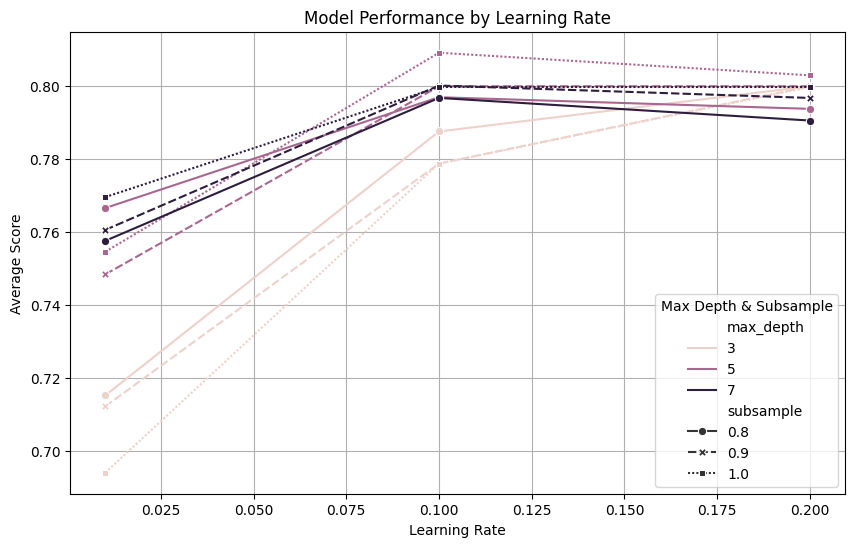

In [60]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_scores, x="learning_rate", y="score", hue="max_depth", style="subsample", markers=True)
plt.title("Model Performance by Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Average Score")
plt.grid(True)
plt.legend(title="Max Depth & Subsample")
plt.show()

In [151]:
print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

Scikit-learn version: 1.6.1
XGBoost version: 2.1.3
